In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,swift_yn,scala_yn,go_yn,elm_yn,ruby_yn,csharp_yn,rust_yn,sql_yn,matlab_yn,julia_yn
0,Data Scientist,$78K-$133K\r\n(Glassdoor est.),"Publishers Clearing House (PCH), located in Je...",3.3,Publishers Clearing House\r\n3.3,"Jericho, NY",-1,501 to 1000 Employees,1953,Company - Private,...,0,0,1,0,0,0,1,0,0,0
1,Principal Data Scientist,$71K-$116K\r\n(Glassdoor est.),Technology. Flexibility. Diversity. At the cen...,3.8,Cummins Inc.\r\n3.8,"Columbus, IN",-1,10000+ Employees,1919,Company - Public,...,0,0,1,0,0,0,0,1,0,0
2,Senior Food Scientist,$74K-$122K\r\n(Glassdoor est.),Company Description\r\n\r\nOur Company…\r\n\r\...,2.8,Evergreen Packaging LLC\r\n2.8,"Canton, NC",-1,1001 to 5000 Employees,2007,Subsidiary or Business Segment,...,0,0,1,0,0,0,1,0,0,0
3,Data Engineer,$63K-$119K\r\n(Glassdoor est.),Overview:\r\n\r\nThe NSM Insurance Group’s Str...,3.4,NSM Insurance Group\r\n3.4,"Conshohocken, PA",-1,51 to 200 Employees,-1,Company - Private,...,0,1,1,0,0,0,0,1,0,0
4,Electromagnetics Scientist,$59K-$123K\r\n(Glassdoor est.),Riverside Research has an immediate opening in...,3.4,Riverside Research\r\n3.4,"Wright Patterson AFB, OH",-1,501 to 1000 Employees,1967,Nonprofit Organization,...,0,0,1,0,0,0,1,0,1,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'state_hq', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'java_yn', 'swift_yn',
       'scala_yn', 'go_yn', 'elm_yn', 'ruby_yn', 'csharp_yn', 'rust_yn',
       'sql_yn', 'matlab_yn', 'julia_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'sr.' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'
    
## Job title and seniority
## Job description length
## Competitor count
## Hourly wage to annual
## remove new line from job title

In [29]:
df['job_simple'] = df['Job Title'].apply(title_simplifier)

In [30]:
df.job_simple.value_counts()

data scientist    576
na                 56
data engineer      48
mle                 9
director            9
analyst             7
manager             1
Name: job_simple, dtype: int64

In [31]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        640
senior     65
junior      1
Name: seniority, dtype: int64

In [32]:
df.job_state.value_counts()

 CA    135
 VA    104
 NY     60
 MA     51
 MD     42
 TX     40
 IL     26
 OH     20
 PA     20
 DC     19
 AZ     19
 WI     15
 MI     13
 UT     12
 WA     12
 NJ     11
 MO     11
 FL     11
 AL     10
 MN     10
 CT      9
 GA      9
 NC      9
 IN      7
 CO      6
 TN      5
 KY      5
 NE      3
 HI      2
 NH      2
 OR      2
 IA      1
 NM      1
 WV      1
 DE      1
 MS      1
 KS      1
Name: job_state, dtype: int64

In [33]:
# Job description length
df['desc_len'] = df ['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2962
1      9119
2      8669
3      2855
4      3559
       ... 
701    1718
702    3664
703    4030
704    2956
705    1930
Name: desc_len, Length: 706, dtype: int64

In [34]:
df['Competitors']

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
701   -1
702   -1
703   -1
704   -1
705   -1
Name: Competitors, Length: 706, dtype: int64

In [35]:
# Hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [36]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
39,1,50,56
278,1,26,48
580,1,36,68
581,1,36,68


In [40]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\r', ''))

In [41]:
df['company_txt']

0      Publishers Clearing House
1                   Cummins Inc.
2        Evergreen Packaging LLC
3            NSM Insurance Group
4             Riverside Research
                 ...            
701            Purdue University
702                         Esri
703    Space Dynamics Laboratory
704    22nd Century Technologies
705                    IntraEdge
Name: company_txt, Length: 706, dtype: object

In [42]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,state_hq,...,scala_yn,go_yn,elm_yn,ruby_yn,csharp_yn,rust_yn,sql_yn,matlab_yn,julia_yn,desc_len
count,706.000000,706.0,706.000000,706.0,706.000000,706.000000,706.000000,706.000000,706.000000,706.0,...,706.000000,706.000000,706.0,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,3.706516,-1.0,1795.094901,-1.0,0.005666,0.001416,79.730878,128.087819,103.771955,0.0,...,0.229462,0.839943,0.0,0.015581,0.113314,0.137394,0.569405,0.089235,0.012748,3653.143059
std,0.788562,0.0,573.994413,0.0,0.075111,0.037635,22.465951,32.465772,27.049463,0.0,...,0.420785,0.366919,0.0,0.123934,0.317202,0.344507,0.495511,0.285285,0.112264,1486.300042
min,-1.000000,-1.0,-1.000000,-1.0,0.000000,0.000000,12.000000,16.000000,15.500000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,478.000000
25%,3.400000,-1.0,1946.000000,-1.0,0.000000,0.000000,64.250000,108.000000,87.000000,0.0,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2705.250000
50%,3.800000,-1.0,1994.000000,-1.0,0.000000,0.000000,78.000000,124.500000,101.250000,0.0,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3525.000000
75%,4.100000,-1.0,2005.000000,-1.0,0.000000,0.000000,92.000000,145.000000,118.375000,0.0,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4433.250000
max,5.000000,-1.0,2018.000000,-1.0,1.000000,1.000000,212.000000,331.000000,271.500000,0.0,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9710.000000


In [43]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'state_hq', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'java_yn', 'swift_yn',
       'scala_yn', 'go_yn', 'elm_yn', 'ruby_yn', 'csharp_yn', 'rust_yn',
       'sql_yn', 'matlab_yn', 'julia_yn', 'job_simple', 'seniority',
       'desc_len'],
      dtype='object')

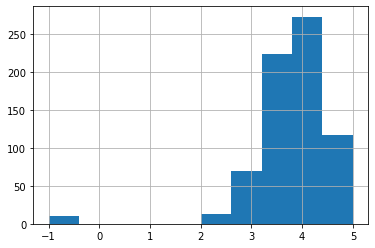

In [44]:
df.Rating.hist()

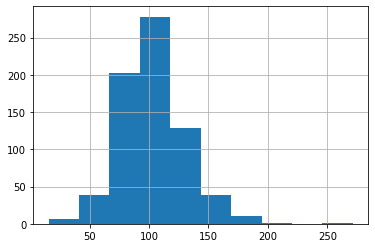

In [46]:
df.avg_salary.hist()

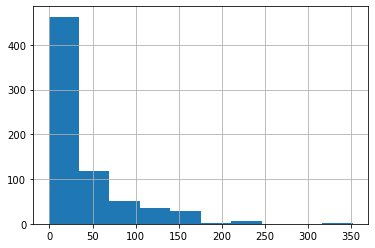

In [47]:
df.age.hist()

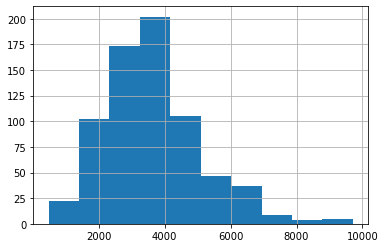

In [48]:
df.desc_len.hist()

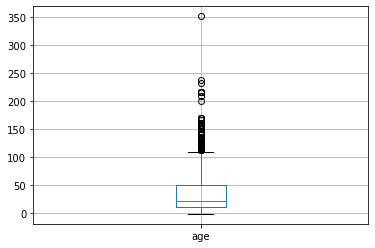

In [49]:
df.boxplot(column = ['age'])

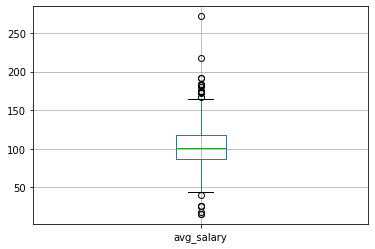

In [50]:
df.boxplot(column = ['avg_salary'])

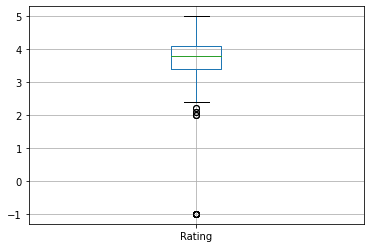

In [51]:
df.boxplot(column = ['Rating'])

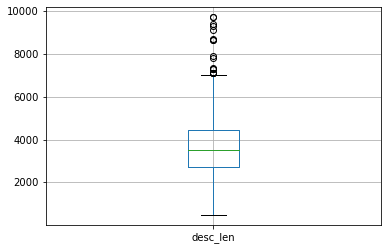

In [52]:
df.boxplot(column = ['desc_len'])

In [53]:
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.056733,0.082998,0.185145
avg_salary,-0.056733,1.000000,0.018314,0.069384
Rating,0.082998,0.018314,1.000000,-0.019876
desc_len,0.185145,0.069384,-0.019876,1.000000


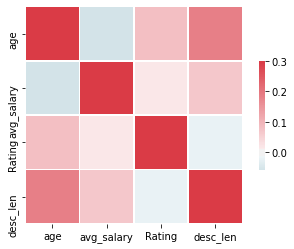

In [54]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_len']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [55]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'state_hq', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'java_yn', 'swift_yn',
       'scala_yn', 'go_yn', 'elm_yn', 'ruby_yn', 'csharp_yn', 'rust_yn',
       'sql_yn', 'matlab_yn', 'julia_yn', 'job_simple', 'seniority',
       'desc_len'],
      dtype='object')

In [56]:
df_cat = df[['Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'java_yn', 'swift_yn',
       'scala_yn', 'go_yn', 'elm_yn', 'ruby_yn', 'csharp_yn', 'rust_yn',
       'sql_yn', 'matlab_yn', 'julia_yn', 'job_simple', 'seniority']]

graph for Location: total = 182


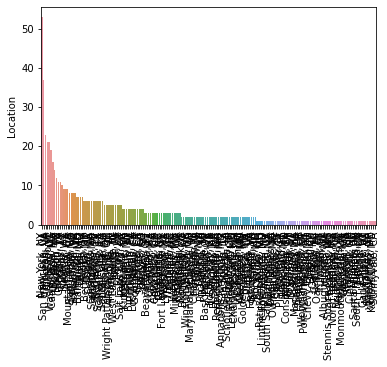

graph for Size: total = 8


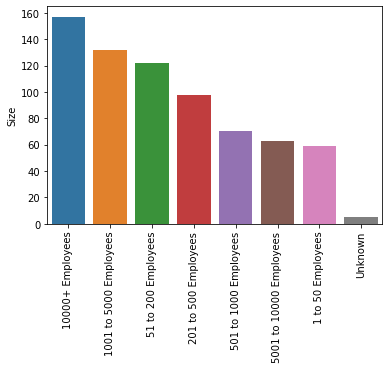

graph for Type of ownership: total = 10


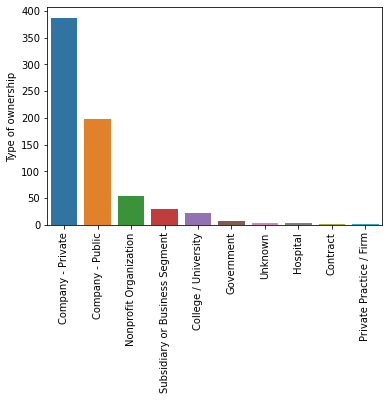

graph for Industry: total = 62


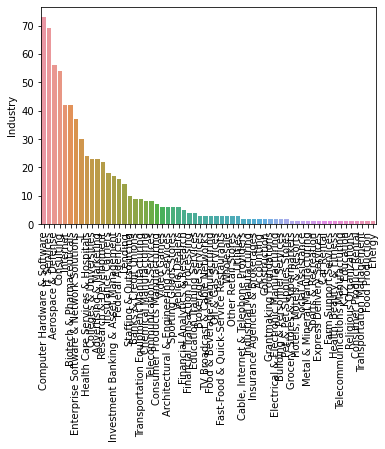

graph for Sector: total = 24


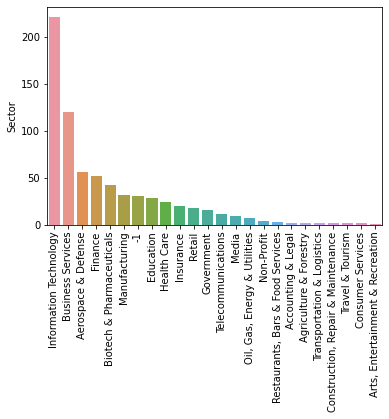

graph for Revenue: total = 13


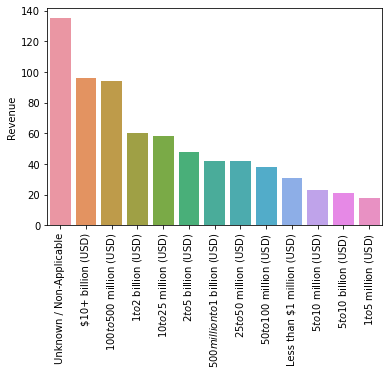

graph for company_txt: total = 403


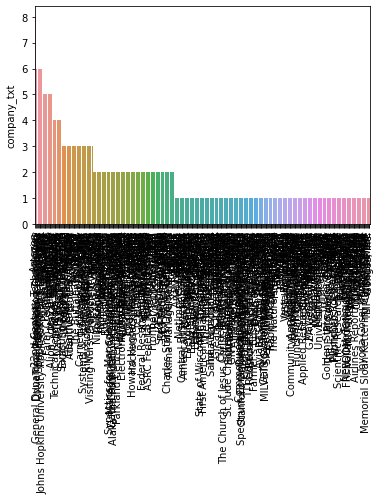

graph for job_state: total = 37


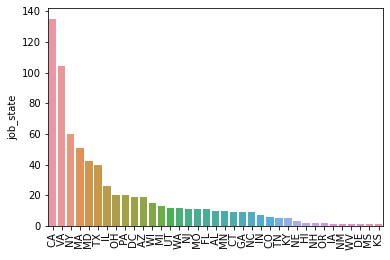

graph for python_yn: total = 2


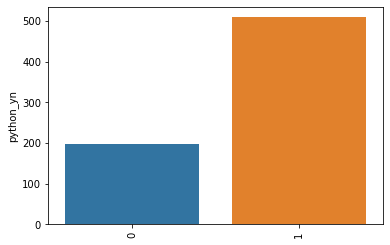

graph for rstudio_yn: total = 2


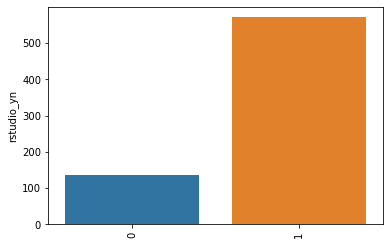

graph for spark_yn: total = 2


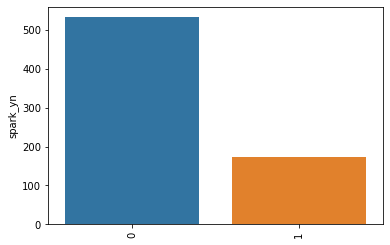

graph for aws_yn: total = 2


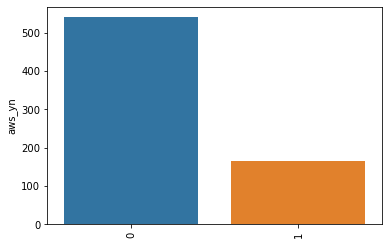

graph for excel_yn: total = 2


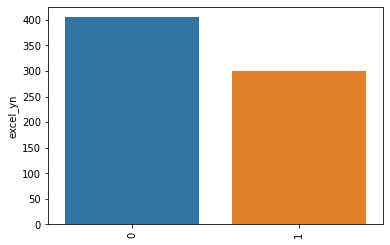

graph for java_yn: total = 2


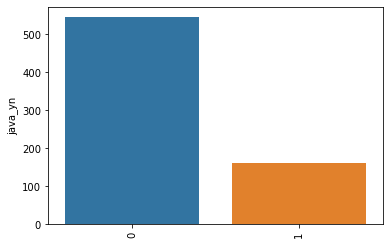

graph for swift_yn: total = 2


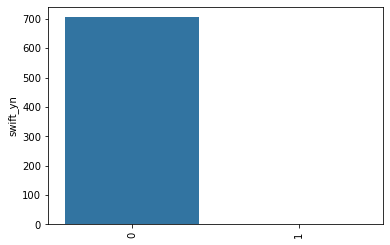

graph for scala_yn: total = 2


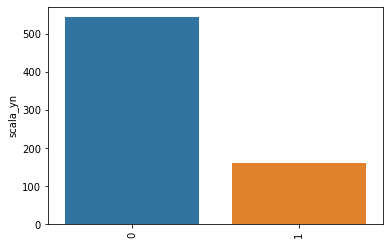

graph for go_yn: total = 2


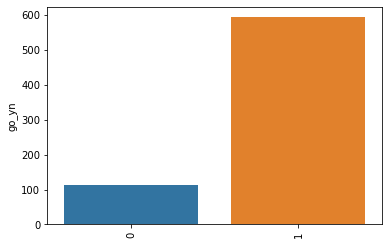

graph for elm_yn: total = 1


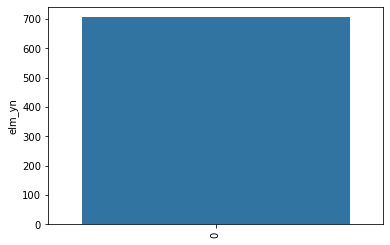

graph for ruby_yn: total = 2


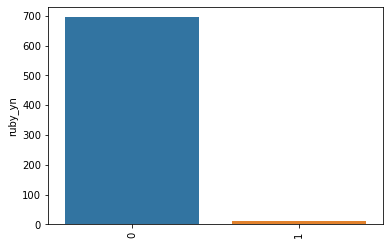

graph for csharp_yn: total = 2


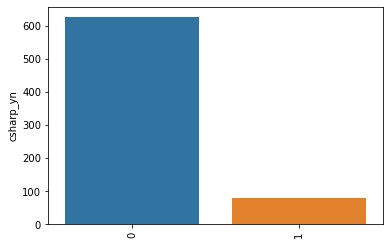

graph for rust_yn: total = 2


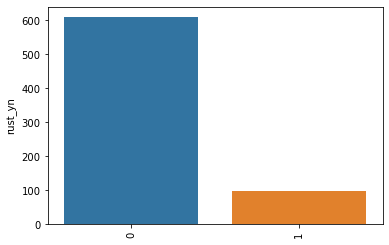

graph for sql_yn: total = 2


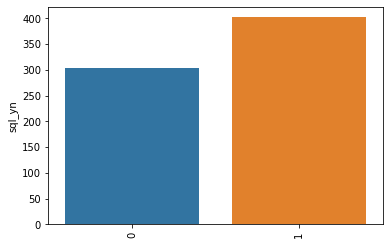

graph for matlab_yn: total = 2


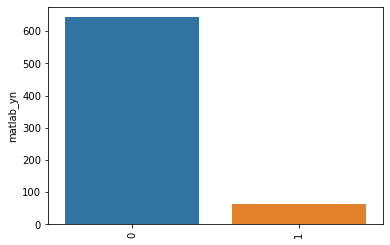

graph for julia_yn: total = 2


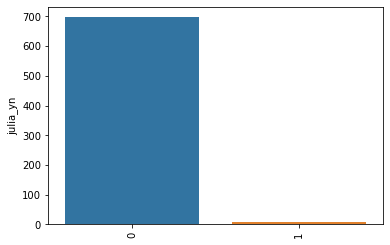

graph for job_simple: total = 7


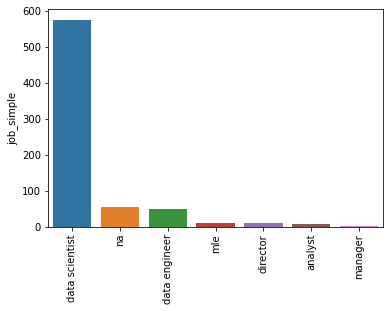

graph for seniority: total = 3


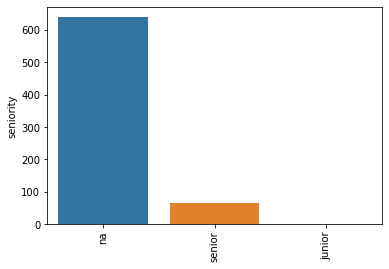

In [60]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


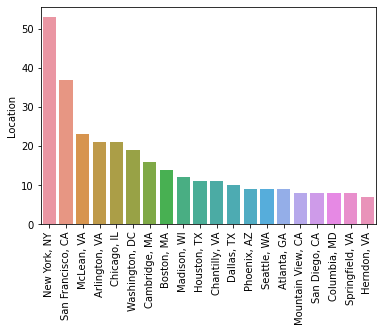

graph for company_txt: total = 20


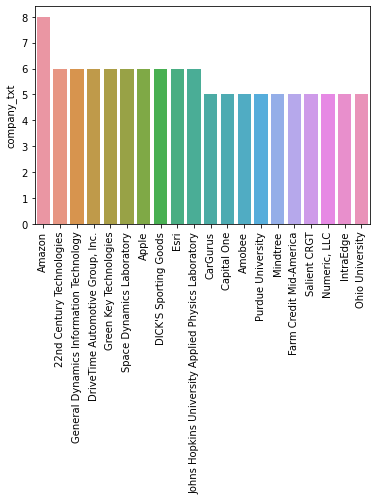

graph for Industry: total = 20


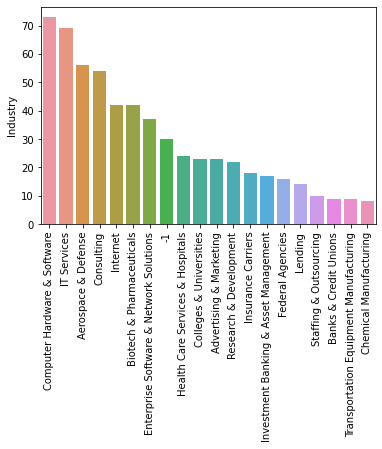

In [62]:
for i in df_cat[['Location', 'company_txt', 'Industry']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [63]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'state_hq', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'java_yn', 'swift_yn',
       'scala_yn', 'go_yn', 'elm_yn', 'ruby_yn', 'csharp_yn', 'rust_yn',
       'sql_yn', 'matlab_yn', 'julia_yn', 'job_simple', 'seniority',
       'desc_len'],
      dtype='object')

In [66]:
pd.pivot_table(df, index = 'job_simple', values = 'avg_salary')

,avg_salary
job_simple,
analyst,87.571429
data engineer,107.458333
data scientist,105.955729
director,94.000000
manager,172.000000
mle,115.277778
na,78.678571


In [68]:
pd.pivot_table(df, index = ['job_simple', 'seniority'], values = 'avg_salary')

avg_salary
job_simple     seniority            
analyst        na          73.900000
               senior     121.750000
data engineer  na         101.441176
               senior     122.071429
data scientist junior      60.000000
               na         103.522346
               senior     141.552632
director       na          94.000000
manager        na         172.000000
mle            na         115.277778
na             na          75.988889
               senior      89.681818

In [77]:
pd.set_option('display.max_rows', None)

In [79]:
pd.pivot_table(df, index = ['job_state', 'job_simple'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = True)

avg_salary
job_state job_simple                
 AL       data scientist           9
          na                       1
 AZ       data scientist          13
          director                 6
 CA       mle                      3
          manager                  1
          na                       5
          data engineer            7
          analyst                  2
          data scientist         117
 CO       data engineer            2
          data scientist           4
 CT       data engineer            1
          data scientist           7
          na                       1
 DC       data scientist          19
 DE       data scientist           1
 FL       data scientist           9
          na                       2
 GA       data scientist           6
          data engineer            3
 HI       data scientist           2
 IA       data engineer            1
 IL       analyst                  2
          data engineer            1
          data scientist          22
          na                       1
 IN       data scientist           7
 KS       data scientist           1
 KY       data scientist           5
 MA       na                      10
          mle                      2
          data engineer            5
          data scientist          33
          director                 1
 MD       data scientist          37
          data engineer            5
 MI       director                 1
          na                       4
          data engineer            1
          data scientist           7
 MN       director                 1
          data engineer            2
          data scientist           7
 MO       data engineer            1
          data scientist          10
 MS       na                       1
 NC       data scientist           5
          na                       4
 NE       data scientist           3
 NH       data scientist           2
 NJ       na                       1
          data scientist           8
          analyst                  1
          data engineer            1
 NM       na                       1
 NY       data engineer            3
          data scientist          55
          na                       2
 OH       analyst                  1
          data scientist          15
          na                       4
 OR       data scientist           2
 PA       data scientist          18
          data engineer            2
 TN       data scientist           4
          na                       1
 TX       data engineer            3
          data scientist          30
          mle                      3
          na                       4
 UT       data engineer            1
          data scientist           5
          na                       6
 VA       data engineer            8
          data scientist          92
          na                       4
 WA       data scientist          11
          mle                      1
 WI       data scientist           9
          na                       4
          analyst                  1
          data engineer            1
 WV       data scientist           1

In [80]:
pd.pivot_table(df[df.job_simple == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,126.649573
KY,114.500000
OR,112.000000
MA,111.757576
KS,111.000000
WA,109.409091
TN,109.000000
NY,106.900000
MD,105.391892


In [81]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'state_hq', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'java_yn', 'swift_yn',
       'scala_yn', 'go_yn', 'elm_yn', 'ruby_yn', 'csharp_yn', 'rust_yn',
       'sql_yn', 'matlab_yn', 'julia_yn', 'job_simple', 'seniority',
       'desc_len'],
      dtype='object')

In [82]:
# rating, industry, sector, revenue, hourly, python, r, spark, awx, excel, java, swift, scala, go, elm, ruby, csharp, rust, sql, matlab, julia, desc_len, type of ownership

In [84]:
df_pivots = df[['Rating', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'java_yn', 'swift_yn', 'scala_yn', 'go_yn', 'elm_yn', 'ruby_yn', 'csharp_yn', 'rust_yn', 'sql_yn', 'matlab_yn', 'julia_yn', 'avg_salary']]

In [88]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.1    151.500000
 2.0    140.000000
 3.6    126.553571
 2.5    120.300000
 4.7    116.636364
 4.9    114.785714
 4.6    112.578947
 4.1    108.697368
 3.9    108.507246
 2.4    108.500000
 4.0    107.042553
 5.0    106.090909
 3.0    105.333333
 3.7    105.136364
-1.0    104.450000
 4.4    103.316667
 2.2    102.750000
 3.8    101.392405
 2.8     99.700000
 3.5     99.159091
 2.9     99.045455
 3.1     98.375000
 4.3     98.333333
 3.3     97.706897
 3.4     97.693878
 4.5     96.233333
 4.2     95.772727
 4.8     95.000000
 3.2     94.933333
 2.7     91.666667
 2.6     91.083333
Type of ownership
                                avg_salary
Type of ownership                         
Hospital                        132.166667
Private Practice / Firm         115.500000
Subsidiary or Business Segment  111.931034
Company - Public                111.434010
Nonprofit Organization          101.915094
Company - Private               100.978036
Gove

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [89]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),26.0,34.0
$1 to $5 million (USD),NaN,18.0
$10 to $25 million (USD),18.0,40.0
$10+ billion (USD),19.0,77.0
$100 to $500 million (USD),34.0,60.0
$2 to $5 billion (USD),14.0,34.0
$25 to $50 million (USD),15.0,27.0
$5 to $10 billion (USD),1.0,20.0
$5 to $10 million (USD),4.0,19.0


In [117]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

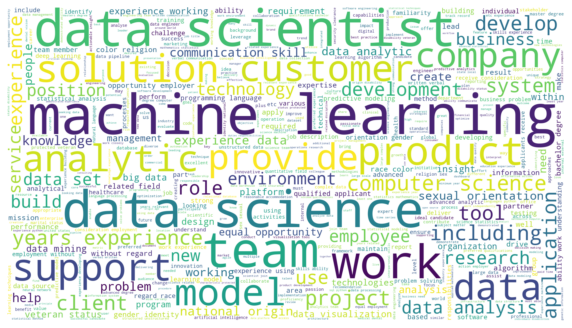

In [119]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 500, width =1920, height = 1080)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()